Importing the necessary libraries

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [240]:
df=pd.read_csv('household_power_consumption.txt',sep=';')

In [241]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [242]:
df.shape

(2075259, 9)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [244]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

It can be seen that there are 25979 null values in sub_metering_3

##### Since the dataset is too large so we'll select a sample of the dataset having 100000 values and use it for further study

In [245]:
df_sample=df.sample(100000)

In [246]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
514795,9/12/2007,05:19:00,0.308,0.112,242.050,1.400,0.000,1.000,0.0
538036,25/12/2007,08:40:00,1.196,0.000,243.870,4.800,0.000,0.000,0.0
1382557,2/8/2009,20:01:00,0.406,0.158,238.900,2.200,0.000,2.000,3.0
369238,30/8/2007,03:22:00,0.206,0.140,243.480,1.000,0.000,0.000,0.0
930571,22/9/2008,22:55:00,0.990,0.000,243.720,4.200,0.000,0.000,0.0


In [247]:
df_sample.reset_index(inplace=True,drop=True)

In [248]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,9/12/2007,05:19:00,0.308,0.112,242.050,1.400,0.000,1.000,0.0
1,25/12/2007,08:40:00,1.196,0.000,243.870,4.800,0.000,0.000,0.0
2,2/8/2009,20:01:00,0.406,0.158,238.900,2.200,0.000,2.000,3.0
3,30/8/2007,03:22:00,0.206,0.140,243.480,1.000,0.000,0.000,0.0
4,22/9/2008,22:55:00,0.990,0.000,243.720,4.200,0.000,0.000,0.0


In [249]:
df_sample.shape

(100000, 9)

In [250]:
df_sample.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           1254
dtype: int64

In [251]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98746 non-null   float64
dtypes: float64(1), object(8)
memory usage: 6.9+ MB


In [252]:
df_sample['Global_active_power'] = pd.to_numeric(df_sample['Global_active_power'], errors='coerce')
df_sample['Global_reactive_power'] = pd.to_numeric(df_sample['Global_reactive_power'], errors='coerce')
df_sample['Voltage'] = pd.to_numeric(df_sample['Voltage'], errors='coerce')
df_sample['Global_intensity'] = pd.to_numeric(df_sample['Global_intensity'], errors='coerce')
df_sample['Sub_metering_1'] = pd.to_numeric(df_sample['Sub_metering_1'], errors='coerce')
df_sample['Sub_metering_2'] = pd.to_numeric(df_sample['Sub_metering_2'], errors='coerce')

In [253]:
df_sample['Global_active_power'].fillna(df_sample['Global_active_power'].mean(),inplace=True)
df_sample['Global_reactive_power'].fillna(df_sample['Global_reactive_power'].mean(),inplace=True)
df_sample['Voltage'].fillna(df_sample['Voltage'].mean(),inplace=True)
df_sample['Global_intensity'].fillna(df_sample['Global_intensity'].mean(),inplace=True)
df_sample['Sub_metering_1'].fillna(df_sample['Sub_metering_1'].mean(),inplace=True)
df_sample['Sub_metering_2'].fillna(df_sample['Sub_metering_2'].mean(),inplace=True)
df_sample['Sub_metering_3'].fillna(df_sample['Sub_metering_3'].mean(),inplace=True)
     

In [254]:
df_sample['Date']=pd.to_datetime(df_sample['Date'])
df_sample['Day']=df_sample['Date'].dt.day
df_sample['Month']=df_sample['Date'].dt.month
df_sample['Year']=df_sample['Date'].dt.year

In [255]:
df_sample['Hour']=pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.hour
df_sample['Minutes']=pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.minute

In [256]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minutes
0,2007-09-12,05:19:00,0.308,0.112,242.05,1.4,0.0,1.0,0.0,12,9,2007,5,19
1,2007-12-25,08:40:00,1.196,0.000,243.87,4.8,0.0,0.0,0.0,25,12,2007,8,40
2,2009-02-08,20:01:00,0.406,0.158,238.90,2.2,0.0,2.0,3.0,8,2,2009,20,1
3,2007-08-30,03:22:00,0.206,0.140,243.48,1.0,0.0,0.0,0.0,30,8,2007,3,22
4,2008-09-22,22:55:00,0.990,0.000,243.72,4.2,0.0,0.0,0.0,22,9,2008,22,55


In [257]:
df_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
Hour                     0
Minutes                  0
dtype: int64

In [258]:
df.duplicated().sum()

0

In [259]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   100000 non-null  datetime64[ns]
 1   Time                   100000 non-null  object        
 2   Global_active_power    100000 non-null  float64       
 3   Global_reactive_power  100000 non-null  float64       
 4   Voltage                100000 non-null  float64       
 5   Global_intensity       100000 non-null  float64       
 6   Sub_metering_1         100000 non-null  float64       
 7   Sub_metering_2         100000 non-null  float64       
 8   Sub_metering_3         100000 non-null  float64       
 9   Day                    100000 non-null  int64         
 10  Month                  100000 non-null  int64         
 11  Year                   100000 non-null  int64         
 12  Hour                   100000 non-null  int64

##### Creating column for total metering

In [260]:
df_sample['Total_metering']=df_sample['Sub_metering_1']+df_sample['Sub_metering_2']+df_sample['Sub_metering_3']

In [261]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minutes,Total_metering
0,2007-09-12,05:19:00,0.308,0.112,242.05,1.4,0.0,1.0,0.0,12,9,2007,5,19,1.0
1,2007-12-25,08:40:00,1.196,0.000,243.87,4.8,0.0,0.0,0.0,25,12,2007,8,40,0.0
2,2009-02-08,20:01:00,0.406,0.158,238.90,2.2,0.0,2.0,3.0,8,2,2009,20,1,5.0
3,2007-08-30,03:22:00,0.206,0.140,243.48,1.0,0.0,0.0,0.0,30,8,2007,3,22,0.0
4,2008-09-22,22:55:00,0.990,0.000,243.72,4.2,0.0,0.0,0.0,22,9,2008,22,55,0.0


###### Dropping the unwanted columns from the dataset

In [262]:
df_sample.drop(columns=['Date','Time','Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],inplace=True)

In [263]:
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,Total_metering
0,0.308,0.112,242.05,1.4,12,9,2007,5,19,1.0
1,1.196,0.000,243.87,4.8,25,12,2007,8,40,0.0
2,0.406,0.158,238.90,2.2,8,2,2009,20,1,5.0
3,0.206,0.140,243.48,1.0,30,8,2007,3,22,0.0
4,0.990,0.000,243.72,4.2,22,9,2008,22,55,0.0


# EDA

In [264]:
df_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Day', 'Month', 'Year', 'Hour', 'Minutes',
       'Total_metering'],
      dtype='object')

There are total 9 features in the dataset which are:

* date: Date in format dd/mm/yyyy
* time: time in format hh: mm: ss
* global_active_power: household globalminute-averaged active power (in kilowatt)
* global_reactive_power: household globalminute-averaged reactive power (in kilowatt)
* voltage: minute-averaged voltage (in volt)
* global_intensity: household globalminute-averaged current intensity (in ampere) 
* sub_metering_1: energy sub-metering No.1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dish washer, an oven and amicrowave (hot plates are not electric but gas powered). 
* sub_metering_2: energy sub-metering No.2 (in watt-hour of active energy). It corresponds to the laundry room,containing a washing-machine, a tumble-drier, a refrigerator and a light 
* sub_metering_3: energy sub-metering No.3 (in watt-hour of active energy). It corresponds to an electric water-heater andan air-conditioner

##### Statistical description of the dataset

In [265]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,100000.0,1.094300,1.053567,0.076,0.3100,0.630,1.522,10.348
Global_reactive_power,100000.0,0.123956,0.112242,0.000,0.0495,0.102,0.194,1.082
Voltage,100000.0,240.832753,3.224231,225.100,239.0100,240.950,242.850,253.190
Global_intensity,100000.0,4.639362,4.429039,0.200,1.4000,2.800,6.400,44.600
Day,100000.0,15.773620,8.817413,1.000,8.0000,16.000,23.000,31.000
Month,100000.0,6.495550,3.436879,1.000,4.0000,7.000,9.000,12.000
Year,100000.0,2008.432870,1.126946,2006.000,2007.0000,2008.000,2009.000,2010.000
Hour,100000.0,11.526250,6.940854,0.000,5.0000,12.000,18.000,23.000
Minutes,100000.0,29.532860,17.299991,0.000,15.0000,30.000,44.000,59.000
Total_metering,100000.0,8.846819,12.736078,0.000,0.0000,1.000,18.000,128.000


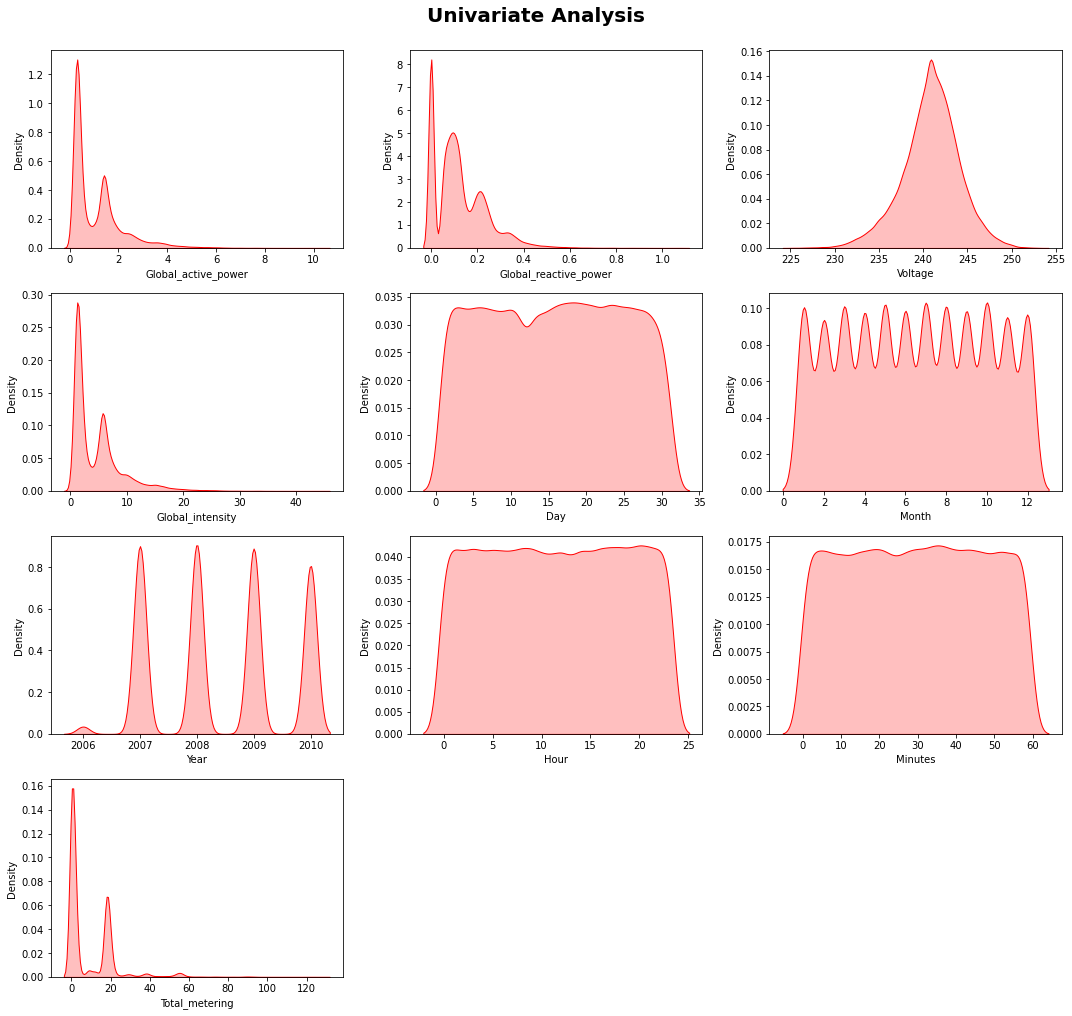

In [266]:
plt.figure(figsize=(15,17))
plt.suptitle("Univariate Analysis",fontsize=20,fontweight='bold',y=1)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_sample[df_sample.columns[i]],shade=True,color='r')
    plt.xlabel(df_sample.columns[i])
    plt.tight_layout()

Observations:
* Global_active_power- Power is distributed between 0 to 8. Most of the power distributed between 0 to 2.
* Global_reactive_power-Reactive power is distributed between 0 to 0.8. Most of the power distributed between 0 to 2.
* Voltage= Vlotage is distributed between 230 to 250, most of the voltage distributed between 0 to 10.
* Global_intensity- Intensity is distributed between 0 to 20. Most of the intensity distrubuted between 0 to 10.
* Total_metering= metering is distributed between 0 to 60 most of the distribution is between 0 to 25.

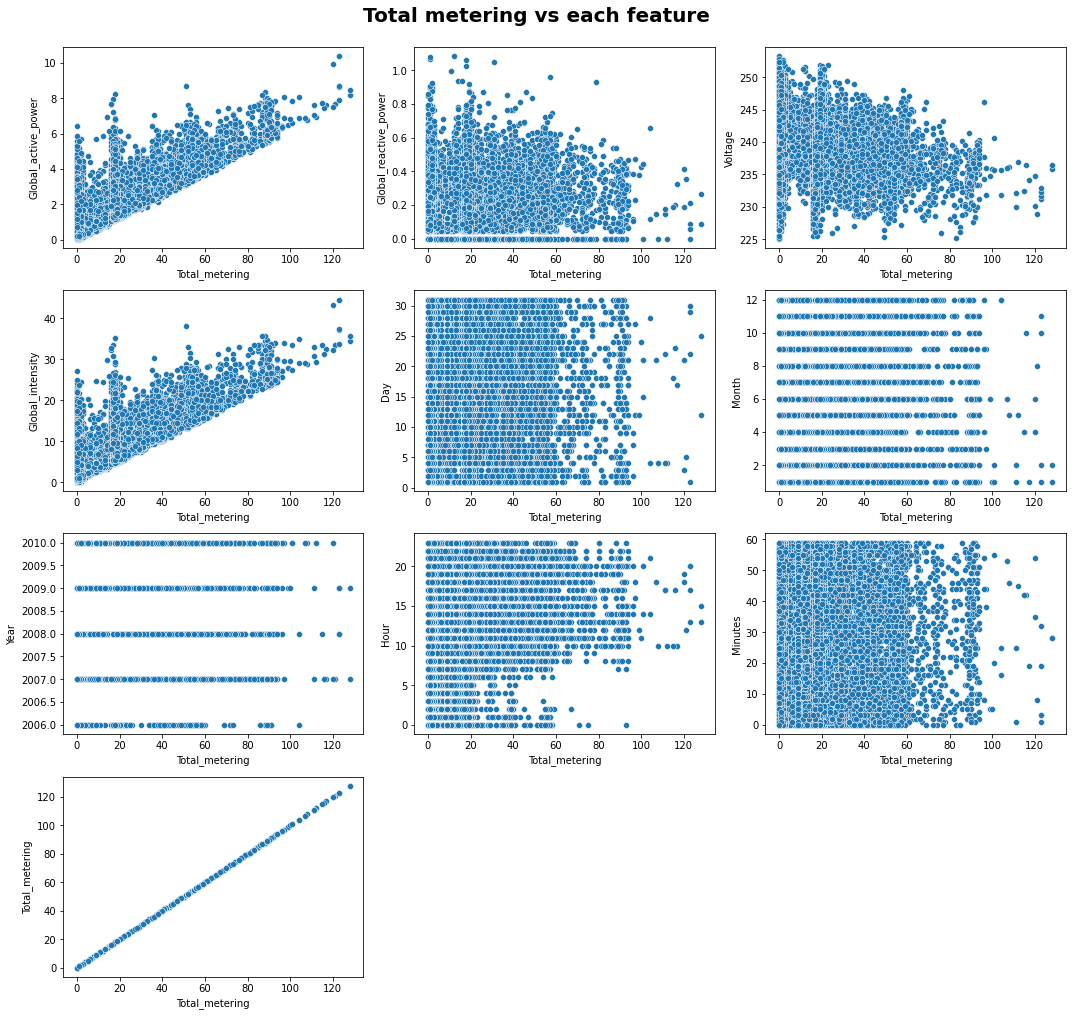

In [267]:
#Realtion of each feature with Total_metering
plt.figure(figsize=(15,17))
plt.suptitle("Total metering vs each feature",fontsize=20,fontweight='bold',y=1)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df_sample['Total_metering'],y=df_sample[df_sample.columns[i]])
    plt.ylabel(df_sample.columns[i])
    plt.xlabel('Total_metering')
    plt.tight_layout()

<AxesSubplot:xlabel='Year', ylabel='Reading in watt-hour'>

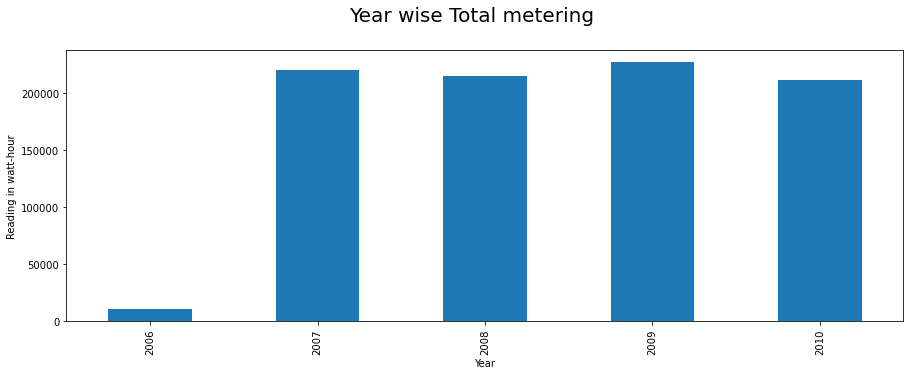

In [268]:
#Year wise Total_metering
plt.figure(figsize=(15,5))
plt.suptitle("Year wise Total metering",fontsize=20,y=1)
df_sample.groupby(df_sample.Year)['Total_metering'].sum().plot(kind='bar',xlabel='Year',ylabel='Reading in watt-hour')

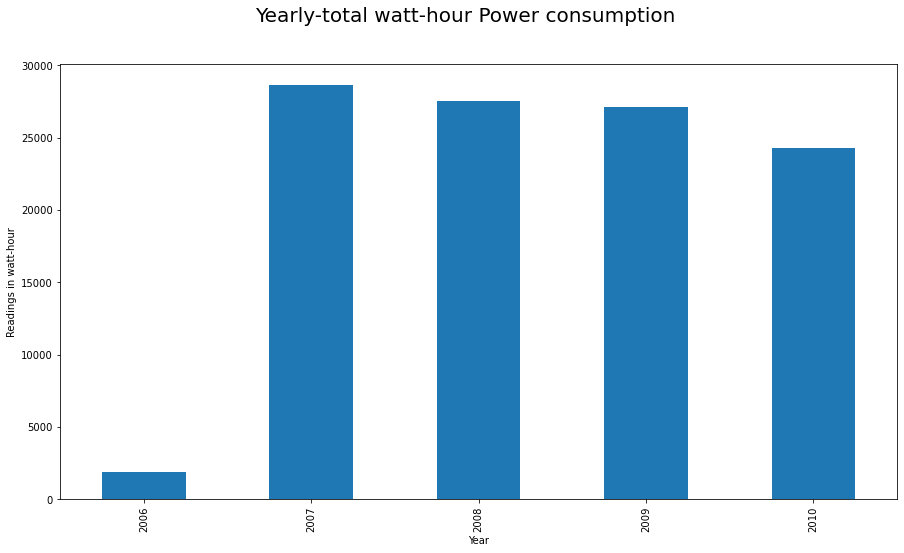

In [269]:
#Year wse total power consumption
plt.figure(figsize=(15,8))
plt.suptitle('Yearly-total watt-hour Power consumption',fontsize=20)
df_sample.groupby(df_sample.Year)['Global_active_power'].sum().plot(kind='bar',xlabel='Year',ylabel='Readings in watt-hour')
plt.show()

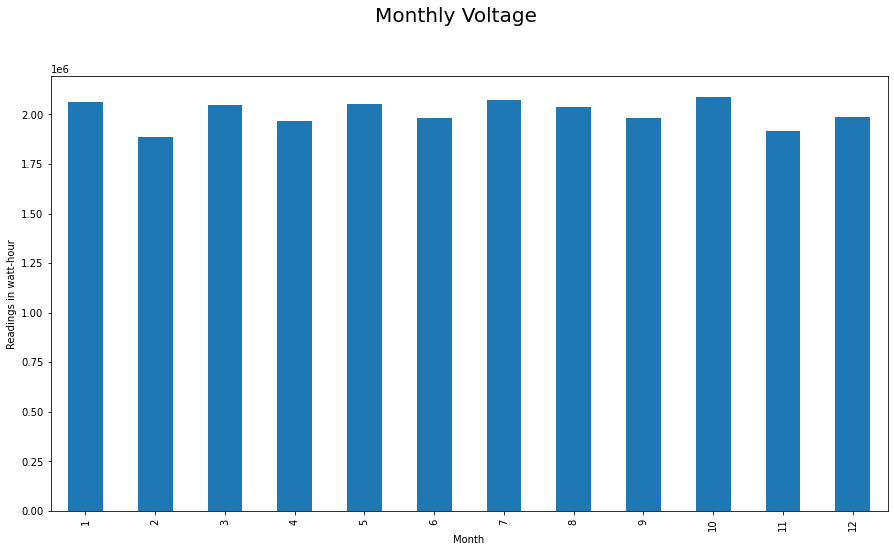

In [270]:
#Year wse total power consumption
plt.figure(figsize=(15,8))
plt.suptitle('Monthly Voltage',fontsize=20,y=1)
df_sample.groupby(df_sample.Month)['Voltage'].sum().plot(kind='bar',xlabel='Month',ylabel='Readings in watt-hour')
plt.show()

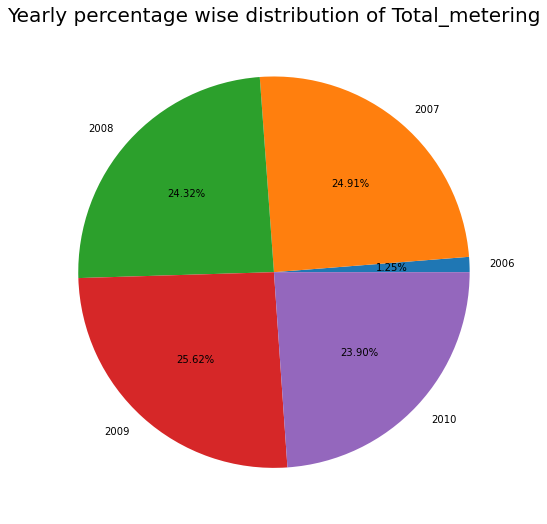

In [271]:
plt.figure(figsize=(9,9))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Total_metering'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Total_metering',fontsize=20)
plt.show()

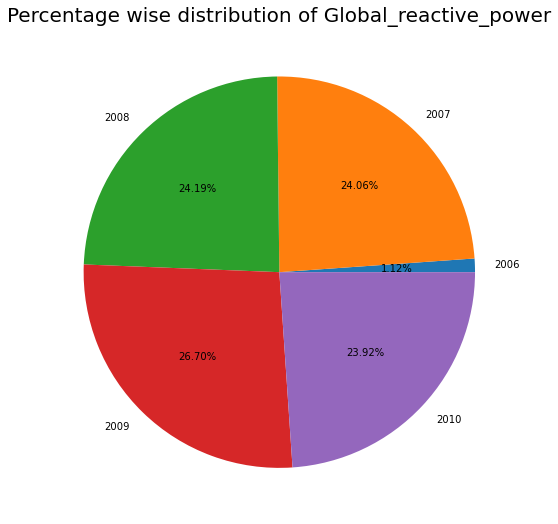

In [272]:
plt.figure(figsize=(9,9))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_reactive_power'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Percentage wise distribution of Global_reactive_power',fontsize=20)
plt.show()

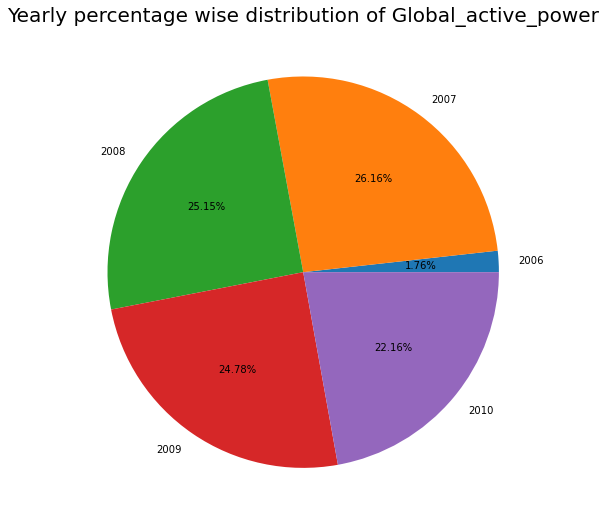

In [273]:
plt.figure(figsize=(9,9))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_active_power'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Global_active_power',fontsize=20)
plt.show()

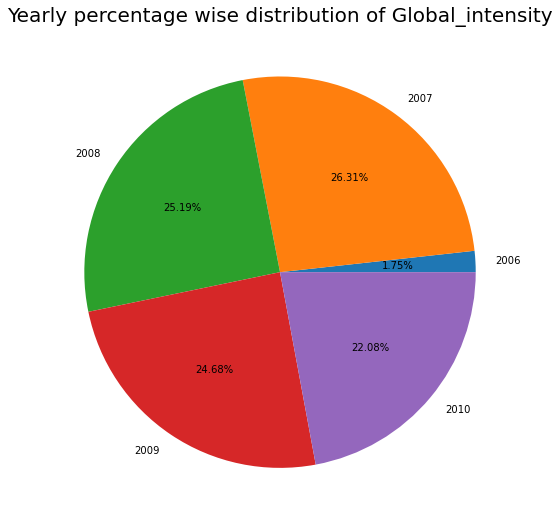

In [274]:
plt.figure(figsize=(9,9))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_intensity'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Global_intensity',fontsize=20)
plt.show()

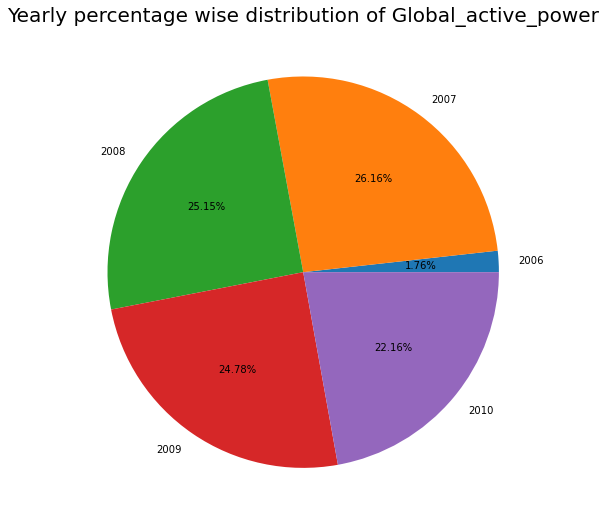

In [275]:
plt.figure(figsize=(9,9))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Global_active_power'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Global_active_power',fontsize=20)
plt.show()

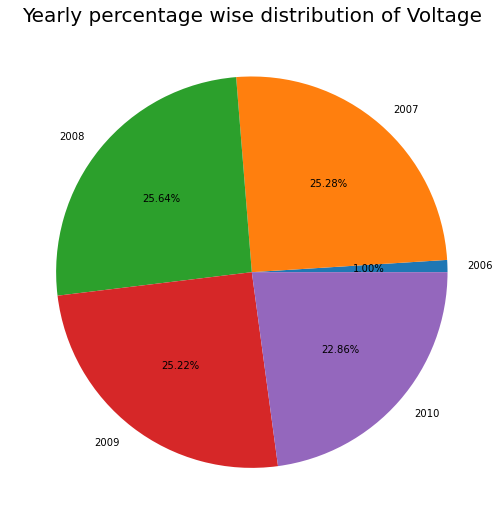

In [276]:
plt.figure(figsize=(9,9))
year_labels= [2006,2007,2008,2009,2010]
plt.pie(x=df_sample.groupby(df_sample['Year'])['Voltage'].sum(),autopct='%1.2f%%',labels=year_labels)
plt.title('Yearly percentage wise distribution of Voltage',fontsize=20)
plt.show()

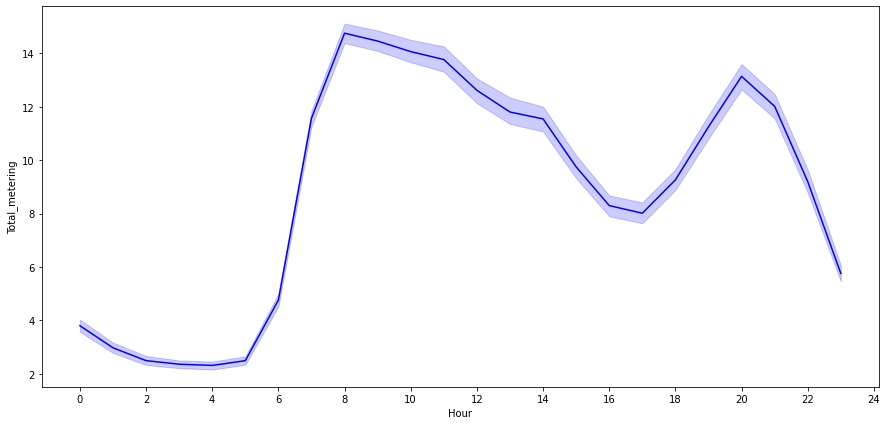

In [277]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Hour',y='Total_metering',data=df_sample,color='blue')
list = np.arange(0,26,2)
plt.xticks(list)
plt.show()

Here it can be seen that in Hourly vs Total_metering the total metering increase after 6 and it is less during 0 to 5 hrs.

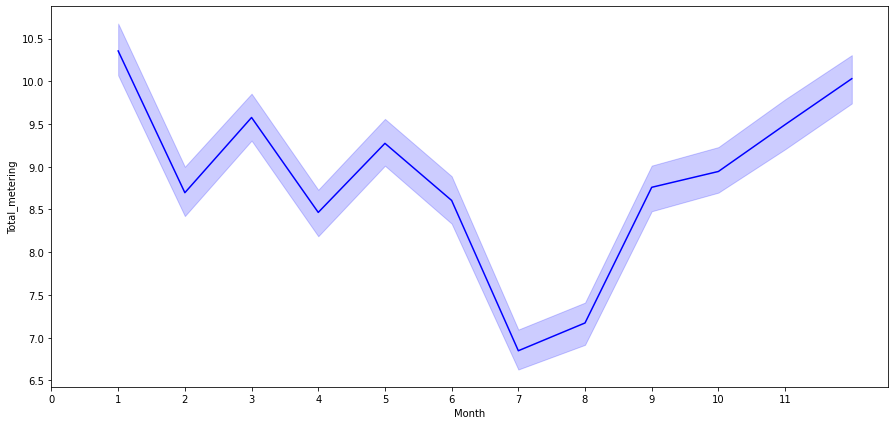

In [278]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Month',y='Total_metering',data=df_sample,color='blue')
list = np.arange(0,12,1)
plt.xticks(list)
plt.show()

<Figure size 1080x1080 with 0 Axes>

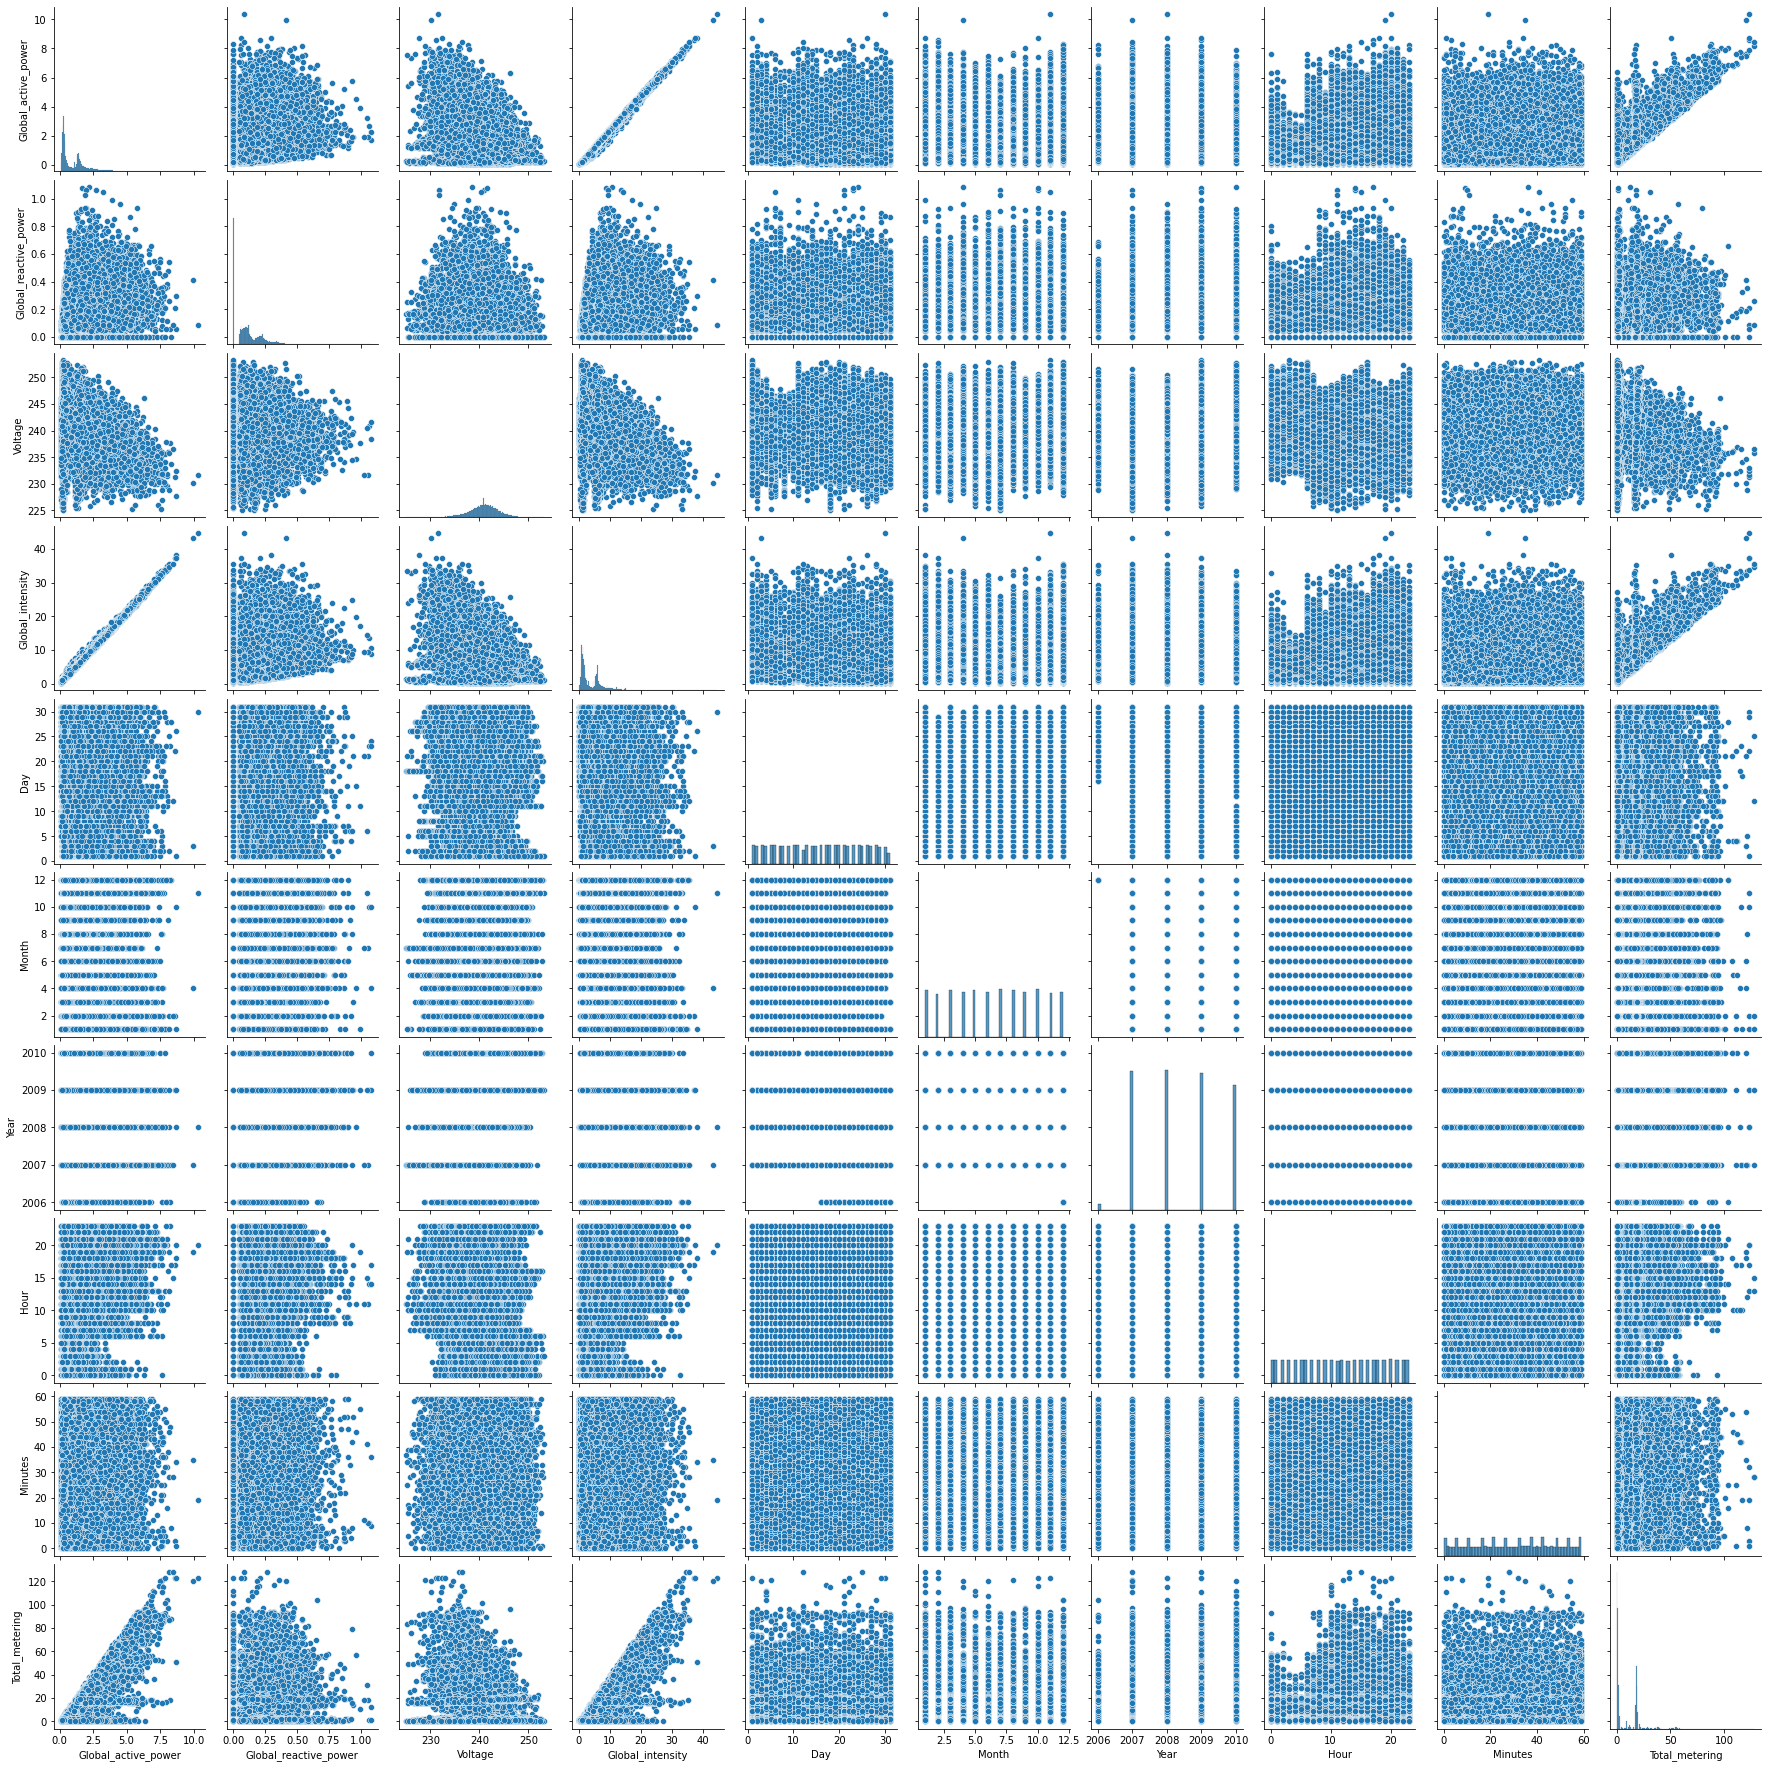

In [279]:
plt.figure(figsize=(15,15))
sns.pairplot(df_sample)
plt.show()

𝐂𝐡𝐞𝐜𝐤𝐢𝐧𝐠 𝐜𝐨𝐫𝐫𝐞𝐥𝐚𝐭𝐢𝐨𝐧

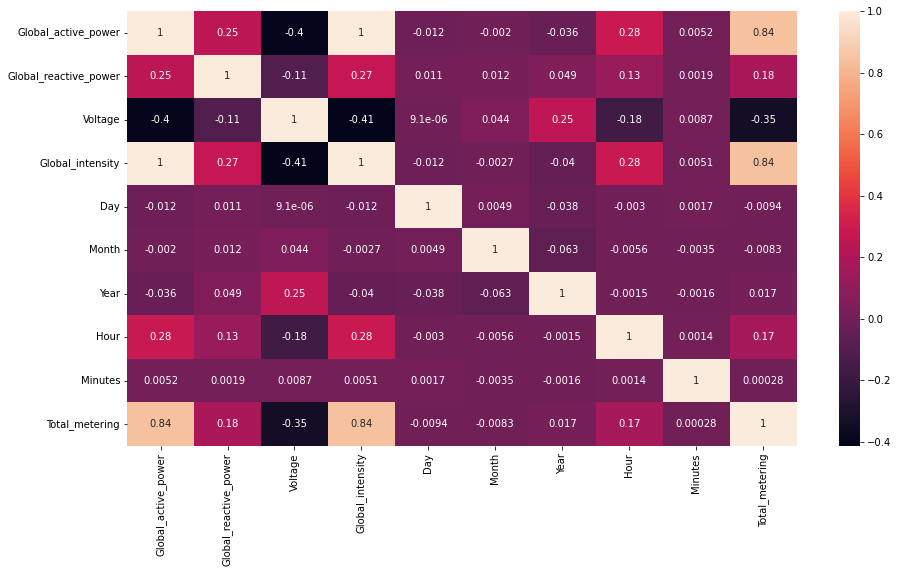

In [280]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df_sample.corr(),annot=True)
plt.show()

𝐂𝐡𝐞𝐜𝐤𝐢𝐧𝐠 𝐟𝐨𝐫 𝐨𝐮𝐭𝐥𝐢𝐞𝐫𝐬

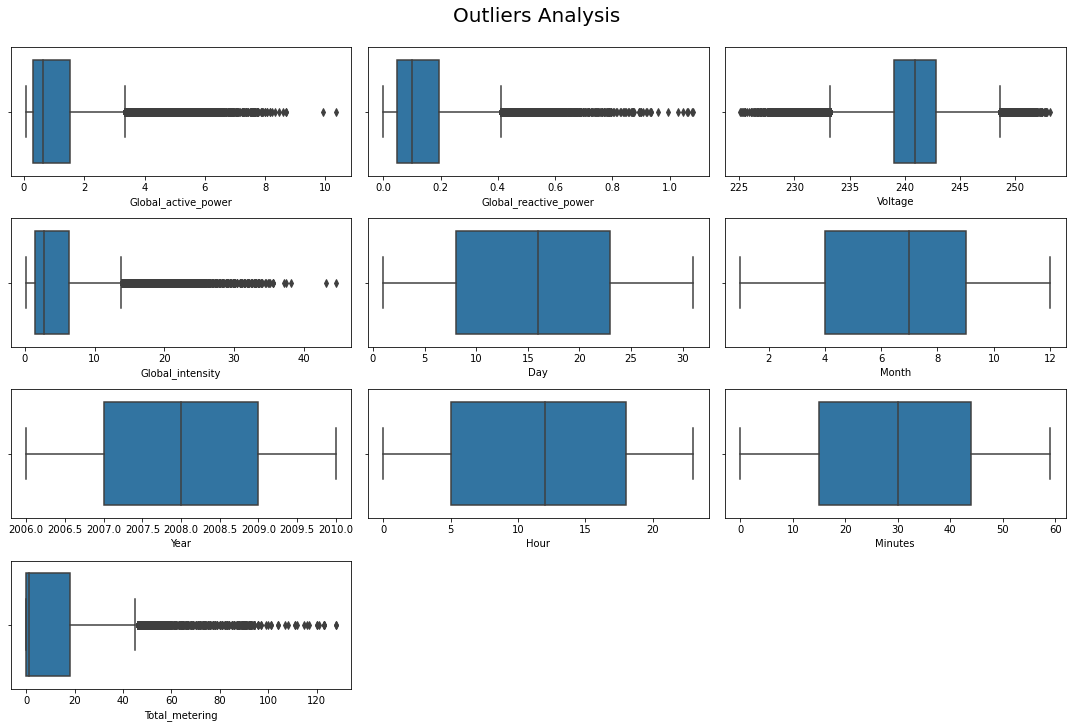

In [281]:
plt.figure(figsize=(15,12))
plt.suptitle("Outliers Analysis",fontsize=20,y=1)
for i in range(0,len(df_sample.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df_sample[df_sample.columns[i]])
    plt.tight_layout()

𝐒𝐚𝐯𝐢𝐧𝐠 𝐭𝐡𝐢𝐬 𝐜𝐥𝐞𝐚𝐧𝐞𝐝 𝐝𝐚𝐭𝐚

In [282]:
df_sample.to_csv('cleaned_power_cosumption_data_1.csv')

In [283]:
df_new=pd.DataFrame()

In [284]:
df_new=df_sample

In [285]:
df_new.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,Total_metering
0,0.308,0.112,242.05,1.4,12,9,2007,5,19,1.0
1,1.196,0.000,243.87,4.8,25,12,2007,8,40,0.0
2,0.406,0.158,238.90,2.2,8,2,2009,20,1,5.0
3,0.206,0.140,243.48,1.0,30,8,2007,3,22,0.0
4,0.990,0.000,243.72,4.2,22,9,2008,22,55,0.0


In [286]:
df_new.shape

(100000, 10)

# Data Preprocessing

Spiltting the input and output feature

In [287]:
X=df_new.drop(['Day','Month','Year','Hour','Minutes','Total_metering'],axis=1)
Y=df_new['Total_metering']

In [288]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,0.308,0.112,242.05,1.4
1,1.196,0.000,243.87,4.8
2,0.406,0.158,238.90,2.2
3,0.206,0.140,243.48,1.0
4,0.990,0.000,243.72,4.2


In [289]:
Y.head()

0    1.0
1    0.0
2    5.0
3    0.0
4    0.0
Name: Total_metering, dtype: float64

###### Splitting the dataset into train test data

In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [291]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((67000, 4), (33000, 4), (67000,), (33000,))

In [292]:
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
15432,0.318,0.122,241.53,1.4
18733,5.268,0.490,234.91,22.6
46873,1.674,0.062,239.75,7.0
53753,0.492,0.332,239.57,2.4
78453,3.880,0.188,239.33,16.2


In [293]:
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
54391,1.362,0.080,242.24,5.6
77374,5.072,0.108,237.47,21.2
9500,2.514,0.384,236.30,10.8
44968,0.226,0.000,243.89,1.0
71196,0.498,0.142,240.31,2.0


In [294]:
Y_train.head()

15432     0.0
18733    53.0
46873    21.0
53753     1.0
78453    39.0
Name: Total_metering, dtype: float64

In [295]:
Y_test.head()

54391    19.0
77374    19.0
9500     20.0
44968     0.0
71196     0.0
Name: Total_metering, dtype: float64

###### Feature Scaling

In [296]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [297]:
X_train_scaled

array([[0.02355919, 0.11444653, 0.59058231, 0.02702703],
       [0.50545171, 0.45966229, 0.35262401, 0.5045045 ],
       [0.15556854, 0.05816135, 0.52659957, 0.15315315],
       ...,
       [0.0194704 , 0.11444653, 0.54996405, 0.02252252],
       [0.02083333, 0.09943715, 0.59202013, 0.02252252],
       [0.12616822, 0.0750469 , 0.56470165, 0.12162162]])

In [298]:
X_test_scaled

array([[0.1251947 , 0.0750469 , 0.61610352, 0.12162162],
       [0.48637072, 0.10131332, 0.44464414, 0.47297297],
       [0.23734424, 0.36022514, 0.40258807, 0.23873874],
       ...,
       [0.01090343, 0.        , 0.35298347, 0.01801802],
       [0.13843458, 0.04502814, 0.66211359, 0.13063063],
       [0.0239486 , 0.23827392, 0.63479511, 0.03153153]])

###### Variance Inflation Factor

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [300]:
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_train_scaled,i) for i in range(X_train_scaled.shape[1])]
vif['Features']=X_train.columns
vif

,vif,Features
0,1011.100053,Global_active_power
1,2.932872,Global_reactive_power
2,2.317909,Voltage
3,1053.325845,Global_intensity


### Model Building

### 1. Linear Regression

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [302]:
Lreg=LinearRegression()
Lreg=Lreg.fit(X_train_scaled,Y_train)

In [303]:
#prediction
Lreg_pred=Lreg.predict(X_test_scaled)

In [304]:
#Performance metrics
MAE=mean_absolute_error(Y_test,Lreg_pred)
MSE=mean_squared_error(Y_test,Lreg_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,Lreg_pred)
training_accuracy=Lreg.score(X_train_scaled,Y_train)
testing_accuracy=Lreg.score(X_test_scaled,Y_test)

In [305]:
print("𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐋𝐢𝐧𝐞𝐚𝐫 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧 :- ")
print("The linear regression coefficients are ",Lreg.coef_)
print("Training Accuracy : {:.5f}".format(training_accuracy))
print("Testing Accuracy : {:.5f}".format(testing_accuracy))
print("MAE value: {:.4f}".format(MAE))
print("MSE value: {:.4f}".format(MSE))
print("RMSE value: {:.4f}".format(RMSE))
print("R2 score value:",r2)

𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐋𝐢𝐧𝐞𝐚𝐫 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧 :- 
The linear regression coefficients are  [ 223.08638096   -0.83761518   -2.25382353 -122.57466705]
Training Accuracy : 0.71511
Testing Accuracy : 0.71540
MAE value: 4.2247
MSE value: 45.6138
RMSE value: 6.7538
R2 score value: 0.7154010353386591


### 2. Support Vector Regressor

In [306]:
from sklearn.svm import SVR

In [307]:
svr=SVR(kernel='linear')
svr.fit(X_train_scaled,Y_train)

SVR(kernel='linear')

In [308]:
#Predicting the test data
svr_pred=svr.predict(X_test_scaled)

In [309]:
#Performance metrics
MAE=mean_absolute_error(Y_test,svr_pred)
MSE=mean_squared_error(Y_test,svr_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,svr_pred)
training_accuracy=svr.score(X_train_scaled,Y_train)
testing_accuracy=svr.score(X_test_scaled,Y_test)

In [310]:
print("𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐒𝐮𝐩𝐩𝐨𝐫𝐭 𝐕𝐞𝐜𝐭𝐨𝐫 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐨𝐫 :- ")
print("Training Accuracy : {:.5f}".format(accuracy))
print("Testing Accuracy : {:.5f}".format(accuracy))
print("MAE value: {:.4f}".format(MAE))
print("MSE value: {:.4f}".format(MSE))
print("RMSE value: {:.4f}".format(RMSE))
print("R2 score value:",r2)

𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐒𝐮𝐩𝐩𝐨𝐫𝐭 𝐕𝐞𝐜𝐭𝐨𝐫 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐨𝐫 :- 
Training Accuracy : 0.70847
Testing Accuracy : 0.70847
MAE value: 4.2297
MSE value: 47.1445
RMSE value: 6.8662
R2 score value: 0.7058507683350284


### 3. Decision Tree Regressor

In [311]:
from sklearn.tree import DecisionTreeRegressor

In [312]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_scaled,Y_train)

DecisionTreeRegressor()

In [314]:
#predicting the test data using the decision tree regressor
dtr_pred=dtr.predict(X_test_scaled)

In [316]:
#performance metrics
MAE=mean_absolute_error(Y_test,dtr_pred)
MSE=mean_squared_error(Y_test,dtr_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,dtr_pred)
training_accuracy=dtr.score(X_train_scaled,Y_train)
testing_accuracy=dtr.score(X_test_scaled,Y_test)

In [317]:
print("𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐨𝐫 :- ")
print("Training Accuracy :{:.5f}".format(training_accuracy))
print("Testing Accuracy : {:.5f}".format(testing_accuracy))
print("MAE value: {:.4f}".format(MAE))
print("MSE value: {:.4f}".format(MSE))
print("RMSE value: {:.4f}".format(RMSE))
print("R2 score value:",r2)

𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐨𝐫 :- 
Training Accuracy :0.99989
Testing Accuracy : 0.55700
MAE value: 3.7594
MSE value: 71.0011
RMSE value: 8.4262
R2 score value: 0.5570016642037321


Here it is observed that the Training accuracy is 99.98% and testing accuracy is 55.7%. This is the condition of overfitting so I'm using Random forest to prevent overfitting.

### 4. Random Forest Regressor

In [323]:
from sklearn.ensemble import RandomForestRegressor

In [325]:
rfr=RandomForestRegressor()
rfr.fit(X_train_scaled,Y_train)

RandomForestRegressor()

In [327]:
#predicting the test data
rfr_pred=rfr.predict(X_test_scaled)

In [328]:
#performance metrics
MAE= mean_absolute_error(Y_test,rfr_pred)
MSE=mean_squared_error(Y_test,rfr_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,rfr_pred)
training_accuracy=rfr.score(X_train_scaled,Y_train)
testing_accuracy=rfr.score(X_test_scaled,Y_test)

In [329]:
print("𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐨𝐫 :- ")
print("Training Accuracy :{:.5f}".format(training_accuracy))
print("Testing Accuracy : {:.5f}".format(testing_accuracy))
print("MAE value: {:.4f}".format(MAE))
print("MSE value: {:.4f}".format(MSE))
print("RMSE value: {:.4f}".format(RMSE))
print("R2 score value:",r2)

𝐑𝐞𝐬𝐮𝐥𝐭𝐬 𝐟𝐨𝐫 𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭 𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐨𝐫 :- 
Training Accuracy :0.96630
Testing Accuracy : 0.75491
MAE value: 3.1398
MSE value: 39.2818
RMSE value: 6.2675
R2 score value: 0.7549083017683212
